## ASR

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install transformers
!pip install pydub
!pip install googletrans==3.1.0a0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 68.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 8.5 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl si

In [ ]:
import librosa
import soundfile as sf

def resample_wav(input_path, output_path):
    # Load .wav file
    y, sr = librosa.load(input_path, sr=None)

    # Resample to 16000 Hz
    y_16k = librosa.resample(y, orig_sr=sr, target_sr=16000)

    # Save the new .wav file
    sf.write(output_path, y_16k, 16000)

    print(f'Successfully converted {input_path} to 16kHz sample rate at {output_path}')


# Example usage:
input_file = "/content/drive/MyDrive/MY FYP/BLIP Pipline/Data/audio.wav"
output_file = "/content/drive/MyDrive/MY FYP/BLIP Pipline/Outputs/audio_16kHz.wav"

resample_wav(input_file, output_file)

Successfully converted /content/drive/MyDrive/MY FYP/BLIP Pipline/Data/audio.wav to 16kHz sample rate at /content/drive/MyDrive/MY FYP/BLIP Pipline/Outputs/audio_16kHz.wav


In [ ]:
from transformers import Wav2Vec2ForCTC, AutoProcessor

model_id = "facebook/mms-1b-all"
target_lang = "urd-script_arabic"

processor = AutoProcessor.from_pretrained(model_id, target_lang=target_lang)
model = Wav2Vec2ForCTC.from_pretrained(model_id, target_lang=target_lang, ignore_mismatched_sizes=True)

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/mms-1b-all and are newly initialized because the shapes did not match:
- lm_head.bias: found shape torch.Size([154]) in the checkpoint and torch.Size([127]) in the model instantiated
- lm_head.weight: found shape torch.Size([154, 1280]) in the checkpoint and torch.Size([127, 1280]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import soundfile as sf
import torch

def transcribe_audio(wav_file_path):

    inputs = processor(audio_input, sampling_rate=16_000, return_tensors="pt")

    with torch.no_grad():
      outputs = model(**inputs).logits

    ids = torch.argmax(outputs, dim=-1)[0]
    transcription = processor.decode(ids)

    return transcription

# Usage:
transcription = transcribe_audio('/content/drive/MyDrive/MY FYP/BLIP Pipline/Outputs/audio_16kHz.wav')


print(transcription)

اس عورت نے کیا پہنا ہے


In [ ]:
from googletrans import Translator, constants
from pprint import pprint

translator = Translator()

translation = translator.translate(transcription, src = "ur", dest="en")
print(f"{translation.origin} ({translation.src}) --> {translation.text} ({translation.dest})")
print(translation.text)

اس عورت نے کیا پہنا ہے (ur) --> What is this woman wearing? (en)
What is this woman wearing?


In [ ]:
!pip install -qU transformers

In [ ]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForQuestionAnswering
import torch

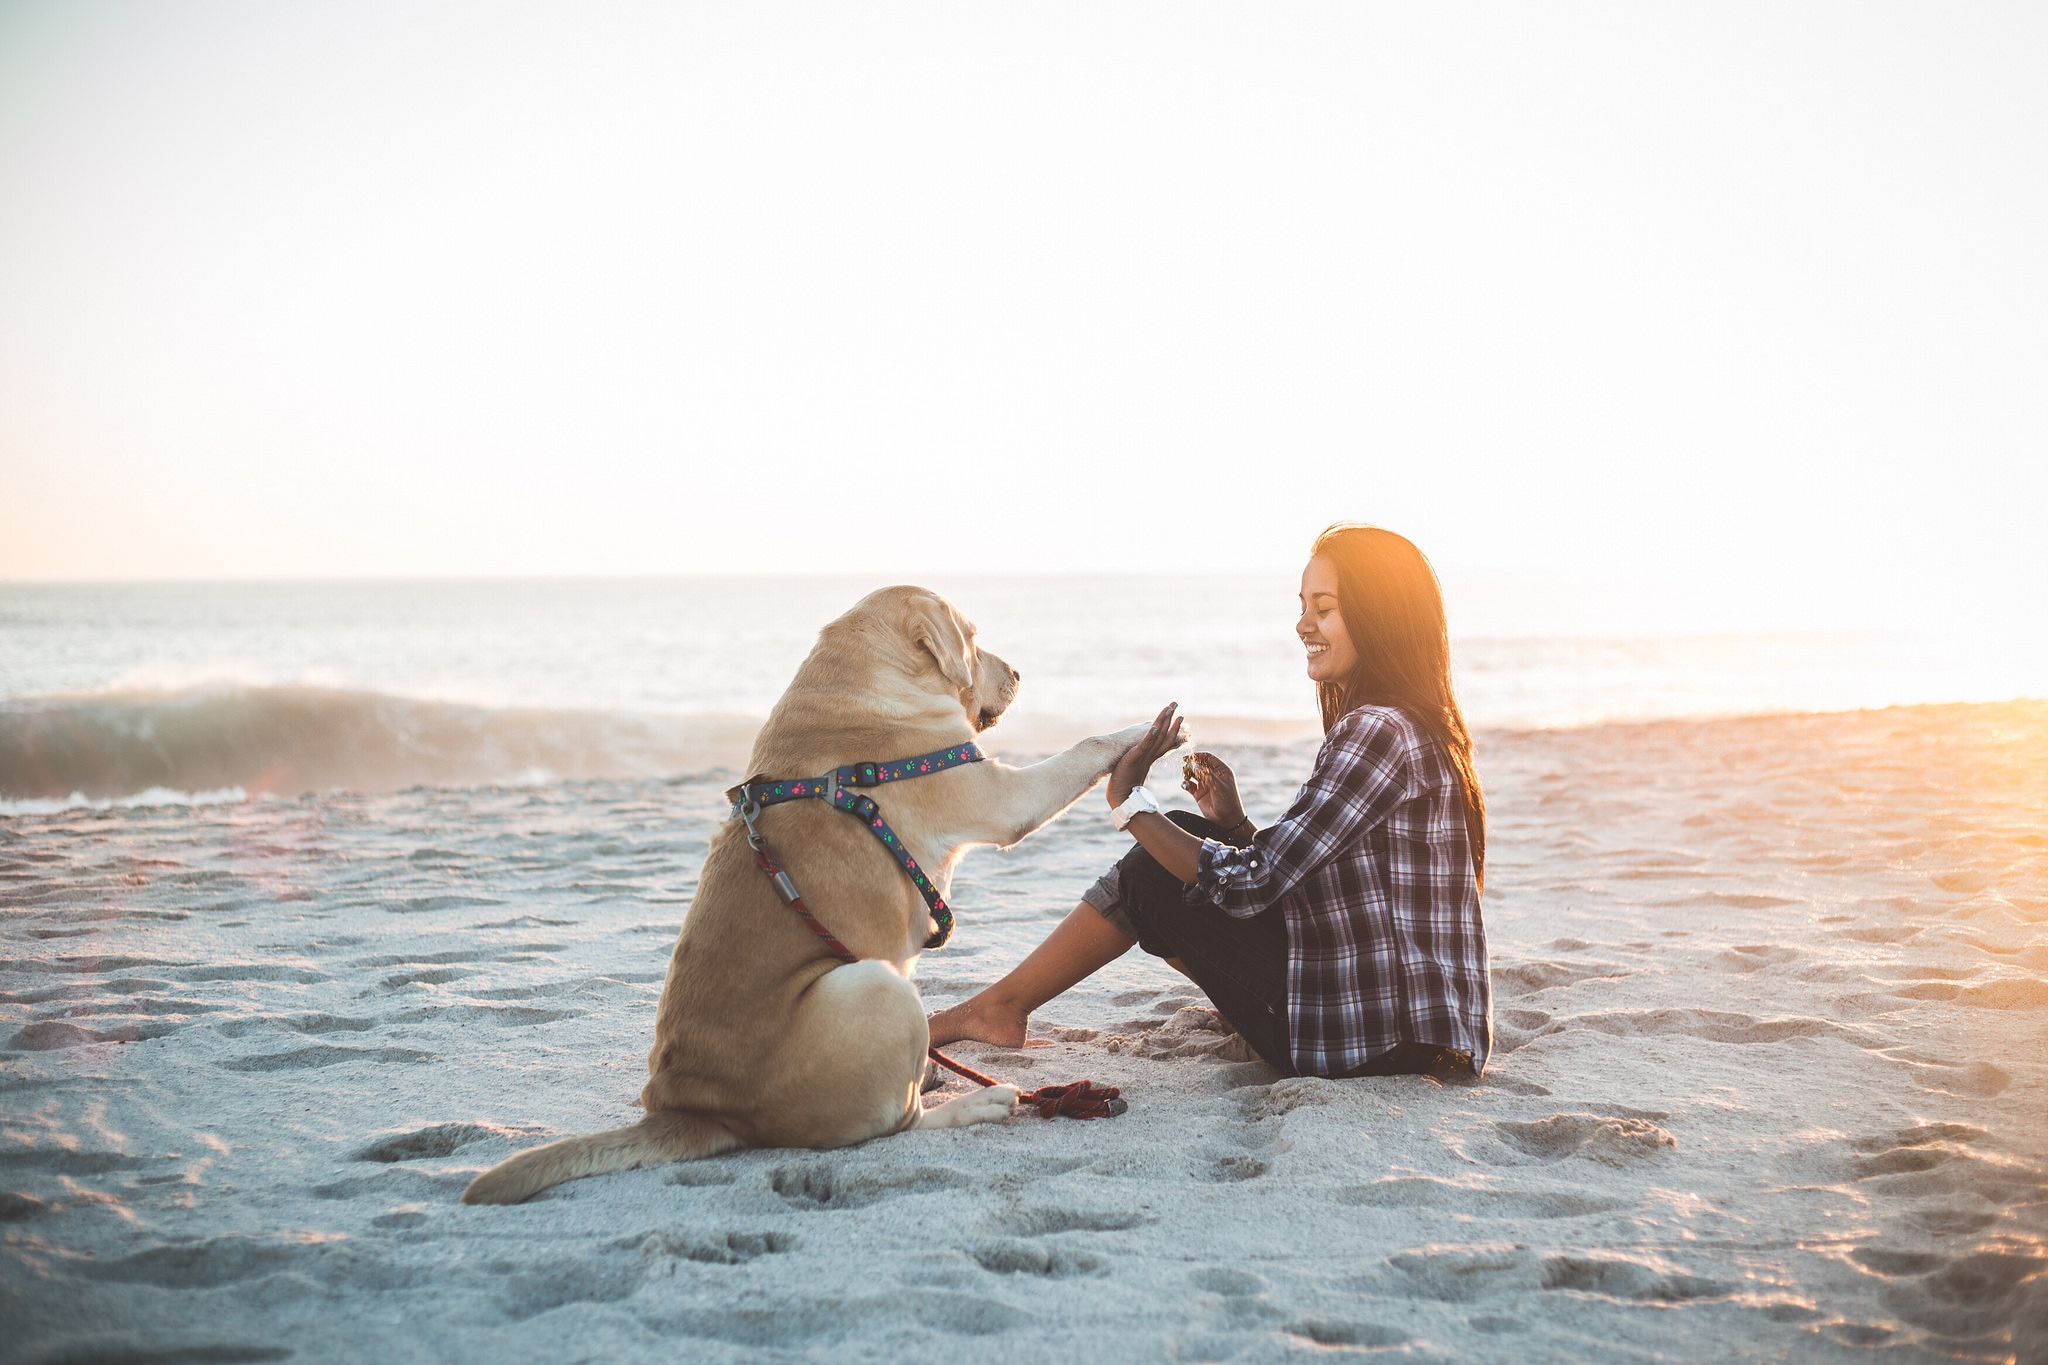

In [ ]:
img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg'
image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')
image

In [ ]:
processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base")

In [ ]:
def get_answer_blip(model, processor, image, question):
    """Answers the given question and handles all the preprocessing and postprocessing steps"""
    # preprocess the given image and question
    inputs = processor(image, question, return_tensors="pt")
    # generate the answer (get output)
    out = model.generate(**inputs)
    # post-process the output to get human friendly english text
    return (processor.decode(out[0], skip_special_tokens=True))

In [ ]:
question = translation.text
answer = get_answer_blip(model, processor, image, question)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1260: UserWarning: Using the model-agnostic default `max_length` (=20) to control thegeneration length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [ ]:
print(answer)

plaid shirt


In [ ]:
translation = translator.translate(answer, src = "en", dest="ur")
print(f"{translation.origin} ({translation.src}) --> {translation.text} ({translation.dest})")
print(translation.text)

plaid shirt (en) --> اونی چادر (ur)
اونی چادر


### TTS

In [ ]:
!pip install --upgrade accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 4.2 MB/s eta 0:00:00


In [ ]:
from transformers import VitsModel, AutoTokenizer
import torch

model = VitsModel.from_pretrained("facebook/mms-tts-urd-script_arabic")
tokenizer = AutoTokenizer.from_pretrained("facebook/mms-tts-urd-script_arabic")

text = str(translation)
inputs = tokenizer(text, return_tensors="pt")

with torch.no_grad():
    output = model(**inputs).waveform

In [ ]:
from IPython.display import Audio

Audio(output, rate=model.config.sampling_rate)